[^ gor: Uvod](00_uvod.ipynb)

# Kompleksna števila

V *Pythonu* so kompleksna števila vgrajena. Imaginarna enota se imenuje `j` in jo postavimo neposredno za številko.

In [8]:
1j**2 # 1j je v Pythonu imaginarna enota

(-1+0j)

In [11]:
type(2+2.2j) #kompleksna števila imajo v Pythonu svoj tip

complex

### Primer

Zapiši število $$z=\frac{1-2i}{1+i}$$ v obliki $x+iy$ in izračunaj $|z|$.

In [13]:
z = (1-2j)/(1+1j) #Python zlahka opravi z deljenjem kompleksnih števil, a računa približno s števili s plavajočo vejico
z

(-0.5-1.5j)

In [14]:
abs(z) # rezultat je podan v decimalnem zapisu

1.5811388300841898

Če želimo, da *Python* pusti rezultat v obliki korenov in ulomkov, potrebujemo knjižnico [sympy](http://www.sympy.org).

In [42]:
import sympy as sym
from sympy import I #uvozimo imaginarno enoto
sym.init_printing() # lepši izpis formul

In [26]:
a = 1+2*I
a

In [32]:
(type(I),I**2)

(sympy.core.numbers.ImaginaryUnit, -1)

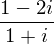

In [28]:
z = (1-2*I)/(1+I)
z

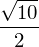

In [29]:
abs(z)

In [34]:
from sympy import S,I
z = 1+I
type(z)

sympy.core.add.Add

In [35]:
abs(z)

## Enačbe s kompleksnimi števili
Reši enačbo
$$iz^2-\bar{z}=0$$

Uporabimo ukaz `solve` iz knjižnice **sympy**.

In [50]:
from sympy import Symbol,Eq,conjugate,solve,im,re
z = Symbol('z')
solve(Eq(I*z**2-conjugate(z),0),z)

Python ni znal poiskati vseh rešitev, zato poskusimo kompleksno enačbo najprej preoblikovati v dve realni enačbi.

In [48]:
x,y = sym.symbols("x,y",real=True) # deklariramo realne spremenljivke
z = x+y*I
lhs = sym.expand_complex(I*z**2-conjugate(z))
lhs

Posebej izenačimo realni del in imaginarni del enačbe.

In [56]:
enacbe = [Eq(re(lhs),0),Eq(im(lhs),0)]
enacbe

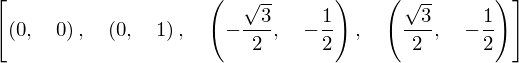

In [57]:
resitve = solve(enacbe,[x,y])
resitve # pari (x,y), ki rešijo sistem enačb

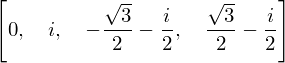

In [58]:
[r[0]+I*r[1] for r in resitve] # rešitve prvotne enačbe kot kompleksna števila

## Množice v kompleksni ravnini

Nobena knjižnica v *Python-u* ne zna risati neposredno v kompleksni ravnini. Zato uporabimo nastavek $z=x+iy$ in vse skupaj prevedemo v ravnino $x,y$.

### Primer
Poišči vse kompleksne rešitve spodnje enačbe, tj. opiši ali skiciraj množico
rešitev v $\mathbb{C}$.

$$ Im\left(\frac{1}{z}\right)=1$$

In [64]:
x,y = sym.symbols("x,y",real=True)
z = x+I*y
z

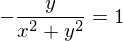

In [65]:
enacba  = Eq(im(1/z),1)
enacba

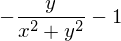

In [68]:
leva = enacba.lhs-enacba.rhs # vse damo na eno stran
leva

Množica rešitev je podana implicitno z enačbo. Zato uporabimo `contour` iz knjižnice [matplotlib](http://www.matplotlib.org).

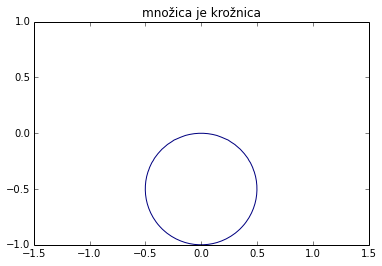

In [82]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
# generiramo mrežo točk (x,y) v kateri bomo izračunali vrednosti leve strani enačbe
xi = np.linspace(-1,1)
X,Y = np.meshgrid(xi,xi) # pripravimo tabele, ki jih lahko direktno vstavimo v funkcijo
fun = sym.lambdify((x,y),leva) # izraz spremenimo v Python funkcijo
plt.contour(X,Y,fun(X,Y),levels=[0]) # narišemo množico točk, pri katerih je leva stran enaka 0 (levels=[0])
plt.axis("equal")
plt.title("množica je krožnica")

### Primer
Skiciraj množico rešitev neenačbe 
  $$ |z-3i+4|\le 4$$
v kompleksni ravnini.

In [108]:
leva = abs(z-3*I+4)-4
leva

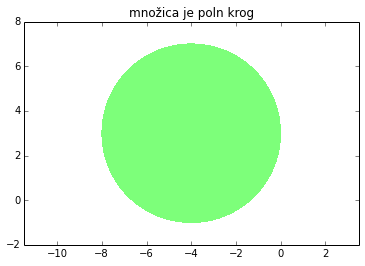

In [113]:
# generiramo mrežo točk (x,y) v kateri bomo izračunali vrednosti leve strani enačbe
xi = np.linspace(-8,0)
yi = np.linspace(-2,8)
X,Y = np.meshgrid(xi,yi) # pripravimo tabele, ki jih lahko direktno vstavimo v funkcijo
fun = sym.lambdify((x,y),leva) # izraz spremenimo v Python funkcijo
fun = np.vectorize(fun)        # Poskrbimo, da funkcija sprejme tudi tabele
plt.contourf(X,Y,fun(X,Y),levels=[0,-4]) # narišemo množico točk, pri katerih je leva stran med 0 in -4 (levels=[0,-4])
plt.axis("equal")
plt.title("množica je poln krog")

## Faktorizacija polinoma
Reši enačbo 
$$z^4 + 4 = 0,$$ nato pa razstavi polinom $z^4 + 4$ na dva kvadratna
faktorja z realnimi koeficienti.

In [115]:
z = Symbol('z')
resitve = solve(z**4+4,z)
resitve

In [125]:
sym.prod([z-z0 for z0 in resitve])

Polinom $z^4+4$ lahko zapišemo kot produkt linearnih faktorjev $(z-z_i)$, kjer so $z_i$ ničle polinoma. Rešitve nastopajo kot konjugirani pari $-1\pm i$ in $1\pm i$. Če skupaj zmnožimo linearne faktorje, ki pripadajo konjugiranemu paru, dobimo razcep na kvadratne faktorje z linearnimi koeficienti.

In [127]:
izraz = sym.expand((z-resitve[0])*(z-resitve[1]))*sym.expand((z-resitve[2])*(z-resitve[3]))
izraz

In [128]:
# če kvadratna faktorja zmnožimo, dobimo prvotni polinom
sym.expand(izraz)

In [129]:
# razcep na kvadratne faktorje lahko izračunamo tudi s funkcijo factor
sym.factor(z**4+4)

## Polarni zapis
Kompleksno število lahko zapišemo tudi v polarni obliki
$$ z =r e^{i\phi} = r(\cos(\phi) + i\sin(\phi)).$$
Polarna oblika je primerna za množenje, potenciranje in korene.
### Primer
Poišči vse korene 
$$\sqrt[3]{-27+27i}.$$
Iščemo rešitve enačbe
$$ z^3 = -27+27i.$$

In [140]:
r,f = sym.symbols("r,f",real=True)
z = r*sym.exp(I*f)
z**3

In [145]:
sym.expand_complex(z**3)

In [149]:
z0 = -27+27*I 
abs(z0)

In [150]:
sym.arg(z0)

Enačbe dobimo tako, da izenačimo $r^3$ z $|z_0|$ in $3\phi$ z $\arg(z_0)$. V enačbi za argument, lahko eni strani dodamo večkratnik $2\pi$:
$$r^3 = 27\sqrt{2}$$
$$3\phi = \frac{3\pi}{4}+2k\pi$$

Rešitev je neskončno
$$r = 3\sqrt[6]{2} $$
$$\phi = \frac{\pi}{4} +\frac{2k\pi}{3}$$

In [167]:
# Če tabeliramo različne rešitve za vrednosti k = -5,-4,...,0,1,..
from sympy import exp
for k in range(-5,5):
    zi = complex(abs(z0)**(1/3)*exp(1j*pi*(1/4+2*k/3)))
    print("%0.5f\t+\t%0.5fi\n" % (re(zi),im(zi)))

-3.25265	+	0.87154i

0.87154	+	-3.25265i

2.38110	+	2.38110i

-3.25265	+	0.87154i

0.87154	+	-3.25265i

2.38110	+	2.38110i

-3.25265	+	0.87154i

0.87154	+	-3.25265i

2.38110	+	2.38110i

-3.25265	+	0.87154i



Čeprav je rešitev za $\phi$ neskončno, je kompleksnih rešitev le končno mnogo - 3, saj se začnejo ponavljati ($e^{i\phi}$ je periodična funkcija s periodo $2\pi$).

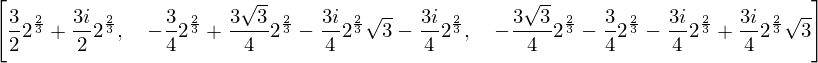

In [170]:
# rešitve seveda lahko piščemo tudi s solve
z = Symbol("z")
solve(Eq(z**3,-27+27*I),z)